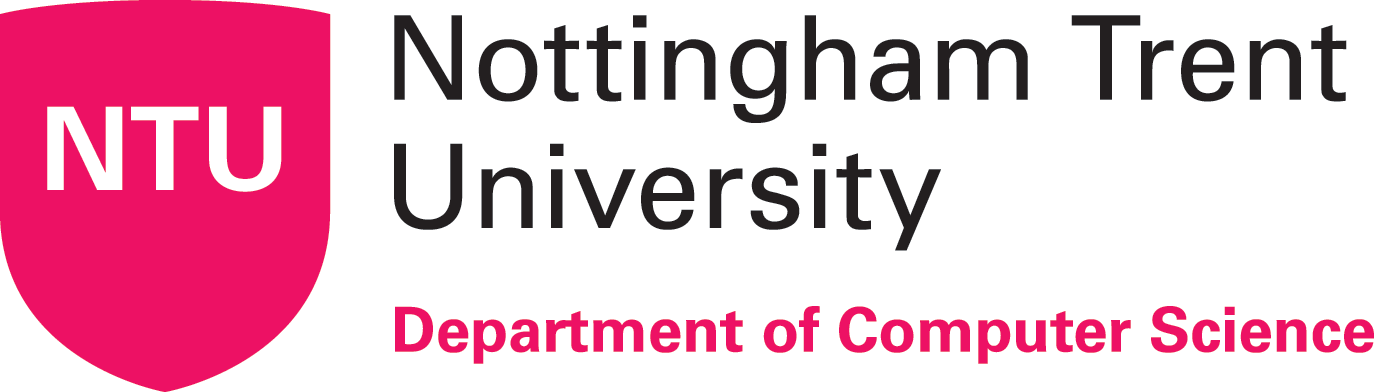

# Python Programming for Real World Data Analytics and GUI Development
## SOFT40161 - Introduction to Computer Programming
### Submission of the Coursework

## Name:
## NTU ID:

<font  color= 'red'> **The Full description of the Coursework is here -** </font>
<a href="https://now.ntu.ac.uk/d2l/le/content/1110621/viewContent/14307207/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-
<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">Update the link and text (Click here)</a>

In [1]:
#Code Source SOFT40161_Lab10: Arif Rahman, Dan Buxton

# Useful functions for accessing remote files stored on Olympus
from pandas import DataFrame
 
def _blob_to_raw(url: str) -> str:
     """
     Convert an Olympus/Git-like 'blob' URL to the corresponding
     'raw/<repo_path>/refs/heads/<branch>/...' URL.
 
     Example:
       'https://.../blob/main/path/to/file.csv'
     -> 'https://.../raw/<repo_path>/refs/heads/main/path/to/file.csv'
     """
     from urllib.parse import urlsplit, urlunsplit
 
     parts = urlsplit(url)
     path = parts.path
 
     # already raw in the desired form
     if path.startswith('/raw/'):
         return url
     if '/blob/' not in path:
         return url
 
     before, _, after = path.partition('/blob/')
     new_path = '/raw' + before + '/refs/heads/' + after.lstrip('/')
     return urlunsplit((parts.scheme, parts.netloc, new_path, parts.query, parts.fragment))
 
def load_olympus_data(url: str) -> DataFrame:
     '''
     Load data from a password-protected URL into a pandas DataFrame by prompting the user for their NTU username and password for authentication.
 
     Parameters:
     url (str): The URL of the CSV file to load.
 
     Returns:
     DataFrame: A pandas DataFrame containing the loaded data.
     '''
     import requests, io, getpass, pandas as pd
 
     username = input('NTU username: ')
     password = getpass.getpass('NTU password: ')
 
     response = requests.get((_blob_to_raw(url)), auth=(username, password))
     response.raise_for_status()
 
     return pd.read_csv(io.StringIO(response.text))

# Section 1: Control Structures (12 marks)


In [ ]:
# Explanation and Documentation 

In [3]:
import csv

#Read CSV file and create output for n amount of rows

with open('Occupancy_Estimation.csv', 'r') as csv_file:
    csvreader = csv.DictReader(csv_file)
    counter = 0
    row_storage_list = []
    for row in csvreader:
        if counter < 10129:
            #print(row)
            row_storage_list.append(row)
            counter += 1
        else: 
            break

print(row_storage_list[0])

first_row = row_storage_list[0]
print(first_row['Date'])

{'Date': '22/12/2017', 'Time': '10:49:41', 'S1_Temp': '24.94', 'S2_Temp': '24.75', 'S3_Temp': '24.56', 'S4_Temp': '25.38', 'S1_Light': '121', 'S2_Light': '34', 'S3_Light': '53', 'S4_Light': '40', 'S1_Sound': '0.08', 'S2_Sound': '0.19', 'S3_Sound': '0.06', 'S4_Sound': '0.06', 'S5_CO2': '390', 'S5_CO2_Slope': '0.769230769', 'S6_PIR': '0', 'S7_PIR': '0', 'Room_Occupancy_Count': '1'}
22/12/2017


In [4]:
Total_Sensor1_Temp = 0

for list_element_data in row_storage_list: 
    #print(list_element_data)
    Sensor1_Temp = float(list_element_data['S1_Temp'])
    #print(Sensor1_Temp)
    Total_Sensor1_Temp += Sensor1_Temp
    #print(f'{Sensor1_Temp:.2f}')
    Sensor4_Sound = float(list_element_data['S4_Sound'])
    #print(Sensor4_Sound)
    
Average_Sensor1_Temp = Total_Sensor1_Temp/len(row_storage_list)

#print(len(row_storage_list))

#print(Total_Sensor1_Temp)
#print(Average_Sensor1_Temp)

In [5]:
print("Welcome to Occupancy Estimation Dataset Analysis Menu:")

Menu_options = """1: Sensor 1 Average Values
2: Sensor 2 Average Values
3: Sensor 3 Average Values
4: Sensor 4 Average Values
5: Sensor 5 Average Values
6: Sensor 6 Average Values
7: Experiment Information 
8: Variable Information
9: Exit"""

Menu_paragraphs = Menu_options.split('\n')

for Menu_paragraph in Menu_paragraphs:
    print(Menu_paragraph.strip())

print()

while True: 
    
    option_input = input("Select a value from the menu:")
    
    if int(option_input) == 1:
        
        Total_Sensor1_Temp = 0
        Total_Sensor1_Light = 0
        Total_Sensor1_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor1_Temp = float(list_element_data['S1_Temp'])
            Total_Sensor1_Temp += Sensor1_Temp
            
            Sensor1_Light = int(list_element_data['S1_Light'])
            Total_Sensor1_Light += Sensor1_Light

            Sensor1_Sound = float(list_element_data['S1_Sound'])
            Total_Sensor1_Sound += Sensor1_Sound
            
        Average_Sensor1_Temp = Total_Sensor1_Temp/len(row_storage_list)
        Average_Sensor1_Light = Total_Sensor1_Light/len(row_storage_list)
        Average_Sensor1_Sound = Total_Sensor1_Sound/len(row_storage_list)

        
        print(f'Average Sensor 1 Temperature: {Average_Sensor1_Temp:.2f}°C')
        print(f'Average Sensor 1 Illuminance: {Average_Sensor1_Light:.2f}Lux')
        print(f'Average Sensor 1 Sound Measurement in Volts: {Average_Sensor1_Sound:.2f}V')
        print()
        
    elif int(option_input) == 2:
        
        Total_Sensor2_Temp = 0
        Total_Sensor2_Light = 0
        Total_Sensor2_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor2_Temp = float(list_element_data['S2_Temp'])
            Total_Sensor2_Temp += Sensor2_Temp
            
            Sensor2_Light = int(list_element_data['S2_Light'])
            Total_Sensor2_Light += Sensor2_Light

            Sensor2_Sound = float(list_element_data['S2_Sound'])
            Total_Sensor2_Sound += Sensor2_Sound
            
        Average_Sensor2_Temp = Total_Sensor2_Temp/len(row_storage_list)
        Average_Sensor2_Light = Total_Sensor2_Light/len(row_storage_list)
        Average_Sensor2_Sound = Total_Sensor2_Sound/len(row_storage_list)

        print(f'Average Sensor 2 Temperature: {Average_Sensor2_Temp:.2f}°C')
        print(f'Average Sensor 2 Illuminance: {Average_Sensor2_Light:.2f}Lux')
        print(f'Average Sensor 2 Sound Measurement in Volts: {Average_Sensor2_Sound:.2f}V')
        print()
        
    elif int(option_input) == 3:
        Total_Sensor3_Temp = 0
        Total_Sensor3_Light = 0
        Total_Sensor3_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor3_Temp = float(list_element_data['S3_Temp'])
            Total_Sensor3_Temp += Sensor3_Temp
            
            Sensor3_Light = int(list_element_data['S3_Light'])
            Total_Sensor3_Light += Sensor3_Light

            Sensor3_Sound = float(list_element_data['S3_Sound'])
            Total_Sensor3_Sound += Sensor3_Sound
            
        Average_Sensor3_Temp = Total_Sensor3_Temp/len(row_storage_list)
        Average_Sensor3_Light = Total_Sensor3_Light/len(row_storage_list)
        Average_Sensor3_Sound = Total_Sensor3_Sound/len(row_storage_list)

        print(f'Average Sensor 3 Temperature: {Average_Sensor3_Temp:.2f}°C')
        print(f'Average Sensor 3 Illuminance: {Average_Sensor3_Light:.2f}Lux')
        print(f'Average Sensor 3 Sound Measurement in Volts: {Average_Sensor3_Sound:.2f}V')
        print()
        
    elif int(option_input) == 4:
        Total_Sensor4_Temp = 0
        Total_Sensor4_Light = 0
        Total_Sensor4_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor4_Temp = float(list_element_data['S4_Temp'])
            Total_Sensor4_Temp += Sensor4_Temp
            
            Sensor4_Light = int(list_element_data['S4_Light'])
            Total_Sensor4_Light += Sensor4_Light

            Sensor4_Sound = float(list_element_data['S4_Sound'])
            Total_Sensor4_Sound += Sensor4_Sound
            
        Average_Sensor4_Temp = Total_Sensor4_Temp/len(row_storage_list)
        Average_Sensor4_Light = Total_Sensor4_Light/len(row_storage_list)
        Average_Sensor4_Sound = Total_Sensor4_Sound/len(row_storage_list)

        print(f'Average Sensor 4 Temperature: {Average_Sensor4_Temp:.2f}°C')
        print(f'Average Sensor 4 Illuminance: {Average_Sensor4_Light:.2f}Lux')
        print(f'Average Sensor 4 Sound Measurement in Volts: {Average_Sensor4_Sound:.3f}V')
        print()
        
    elif int(option_input) == 5:
        Total_Sensor5_CO2 = 0
        Total_Sensor5_CO2_Slope = 0

        for list_element_data in row_storage_list: 
            Sensor5_CO2 = int(list_element_data['S5_CO2'])
            Sensor5_CO2_Slope = float(list_element_data['S5_CO2_Slope'])
            
            Total_Sensor5_CO2 += Sensor5_CO2
        
            Total_Sensor5_CO2_Slope += Sensor5_CO2_Slope
            
        Average_Sensor5_CO2 = Total_Sensor5_CO2/len(row_storage_list)
        Average_Sensor5_CO2_Slope = Total_Sensor5_CO2_Slope/len(row_storage_list)
        
        print(f'Average Sensor 5 CO2 Reading: {Average_Sensor5_CO2:.2f}')
        print(f'Average Sensor 5 CO2 Slope Gradient: {Average_Sensor5_CO2_Slope:.2f}')    
        print()
        
    elif int(option_input) == 6:
        
        Total_Sensor6_Passive_Infrared_Instances = 0
        Total_Sensor7_Passive_Infrared_Instances = 0

        for list_element_data in row_storage_list: 
            Sensor6_Passive_Infrared = int(list_element_data['S6_PIR'])
            Sensor7_Passive_Infrared = int(list_element_data['S7_PIR'])
            
            Total_Sensor6_Passive_Infrared_Instances += Sensor6_Passive_Infrared
            Total_Sensor7_Passive_Infrared_Instances += Sensor7_Passive_Infrared
            
        print(f'Total number of passive infrared instances from sensor 6: {Total_Sensor6_Passive_Infrared_Instances}')
        print(f'Total number of passive infrared instances from sensor 6: {Total_Sensor7_Passive_Infrared_Instances}')
        print()
        
    elif int(option_input) == 7:
        
        info = """This experiment data was collected from seven sensors over a period of time between 22/12/2017 to 26/12/2017 and 
        10/01/2018 to 11/01/2018. 
        During this time up to three people would enter and leave the room.
        Four sensors collected temperature, light and sound data. One sensor collected CO2 data. Two sensors collected instances of 
        motion detection.
        The sensors tracked changes in each variable as room occupancy changed.
        """
        info_paragraphs = info.split('\n')
        for info_paragraph in info_paragraphs:
            print(info_paragraph.strip())
        print()
        
    elif int(option_input) == 8:
        text = """Variable Information:
        
        Date: DD/MM/YYYY
        Temperature: Degree Celsius
        Light: Lux
        Sound: Volts (amplifier output read by ADC)
        CO2: PPM (Parts Per Million)
        CO2 Slope: Slope of CO2 values taken in a sliding window.
        Passive Infrared: Binary value conveying motion detection.
        Room_Occupancy_Count: Number of occupant recorded in the room.
        """
        paragraphs = text.split('\n')
        for paragraph in paragraphs:
            print(paragraph.strip())
        print()
        
    elif int(option_input) == 9:
        print("Thank you for visiting.")
        break


Welcome to Occupancy Estimation Dataset Analysis Menu:
1: Sensor 1 Average Values
2: Sensor 2 Average Values
3: Sensor 3 Average Values
4: Sensor 4 Average Values
5: Sensor 5 Average Values
6: Sensor 6 Average Values
7: Experiment Information
8: Variable Information
9: Exit



Select a value from the menu: 9


Thank you for visiting.


In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [1]:
import pandas as pd
import numpy as np

def null_checker(df):
    column_headings = df.columns.tolist()
    null = df.isnull()
    
    for heading in column_headings:
        null_count = null.value_counts(heading)
        print(null_count)
        print()

def null_handling(df):
    column_headings = df.columns.tolist()
    null = df.isnull()
    Total_nulls_per_column = null.sum()
    d_types = df.dtypes
    Percentage_Null_List = []

    for heading in column_headings:
        Percentage_Null = Total_nulls_per_column[heading]/len(df[heading]) 
        Percentage_Null_List.append(Percentage_Null)
    print(max(Percentage_Null_List))   
    
    if max(Percentage_Null_List) <= 0.01:
        df = df.dropna()
        return df
    else:
        for heading in column_headings: 
            if d_types[heading] == object:
                df[heading] = df[heading].fillna("Data Needs Filling")
            elif d_types[heading] == float or d_types[heading] == int:
                df[heading] = df[heading].fillna(df[heading].median())
        return df     

def row_duplication(df):
    row_list = []
    print(f'The dataset has {len(df)} rows and {len(df)-1} indexes. Pick which rows to duplicate:')
    print()
    range_input1 = input("Pick a starting row from index 0:") 
    range_input2 = input("Pick index of final row and add 1 to input:")
    
    for row_index in range(int(range_input1), int(range_input2)):
        row_slice = df.iloc[row_index,:]
        row_list.append(row_slice)
    df_duplicate_entries =  pd.DataFrame(row_list)
    df_duplicate_handling = pd.concat([df,df_duplicate_entries], ignore_index = True)
    print(f'An additional {len(df_duplicate_handling)-len(df)} rows have been added.')
    return df_duplicate_handling
    
def max_daily_values(df):
    column_headings = df.columns.tolist()
    new_column_headings = column_headings[2:15]
    df_date = df["Date"]
    dates = df_date.unique()

    date_dic_max_values = {}

    for i in range(len(dates)): 
        date_dic = {}
        for headings in new_column_headings:
            filter_date = df.loc[df["Date"] == dates[i] , [headings]]
            max_value = filter_date[headings].max()
            date_dic[headings] = max_value
        date_dic_max_values[dates[i]] = date_dic.copy()
    Max_Value_df = pd.DataFrame(date_dic_max_values)
    return Max_Value_df

def min_daily_values(df):
    column_headings = df.columns.tolist()
    new_column_headings = column_headings[2:15]
    df_date = df["Date"]
    dates = df_date.unique()

    date_dic_min_values = {}

    for i in range(len(dates)): 
        date_dic = {}
        for headings in new_column_headings:
            filter_date = df.loc[df["Date"] == dates[i] , [headings]]
            min_value = filter_date[headings].min()
            date_dic[headings] = min_value
        date_dic_min_values[dates[i]] = date_dic.copy()
    Min_Value_df = pd.DataFrame(date_dic_min_values)
    return Min_Value_df

In [ ]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [23]:
import pandas as pd
import numpy as np

#Creating DataFrame
#df = load_olympus_data("https://olympus.ntu.ac.uk/N1423084/SOFT40161_Intro-to-Computer-Programming/blob/main/Assessment/Occupancy_Estimation.csv")
df = pd.read_csv('Occupancy_Estimation.csv')

#Checks

#Checking Raw Dataset For Missing Values

null_checker(df)

#Examples to show null handling of missing data

# Removal of null rows when the number of missing data is too few.

df_cleaning_example1 = df.copy()

#df_cleaning_example = pd.read_csv('Occupancy_Estimation.csv', nrows = 100)
df_cleaning_example1.iloc[180:200,:] = np.nan
null_checker(df_cleaning_example1)
ex1 = null_handling(df_cleaning_example1)
null_checker(ex1)

print()

# Handling null data row when a large amount of data is missing

df_cleaning_example2 = df.copy()
df_cleaning_example2.iloc[np.r_[800:1000,6425:6725],:] = np.nan
null_checker(df_cleaning_example2)
ex2 = null_handling(df_cleaning_example2)
null_checker(ex2)

#Handling duplicates

#Showing Dataset has no duplicates

print(df.duplicated().value_counts())

#Example to show handling of duplicated rows

df_duplicate_example = df.copy()

df_duplicate_handling = row_duplication(df_duplicate_example)

print(df_duplicate_handling.duplicated().value_counts())

print(len(df_duplicate_handling.drop_duplicates()))



Date
False    10129
Name: count, dtype: int64

Time
False    10129
Name: count, dtype: int64

S1_Temp
False    10129
Name: count, dtype: int64

S2_Temp
False    10129
Name: count, dtype: int64

S3_Temp
False    10129
Name: count, dtype: int64

S4_Temp
False    10129
Name: count, dtype: int64

S1_Light
False    10129
Name: count, dtype: int64

S2_Light
False    10129
Name: count, dtype: int64

S3_Light
False    10129
Name: count, dtype: int64

S4_Light
False    10129
Name: count, dtype: int64

S1_Sound
False    10129
Name: count, dtype: int64

S2_Sound
False    10129
Name: count, dtype: int64

S3_Sound
False    10129
Name: count, dtype: int64

S4_Sound
False    10129
Name: count, dtype: int64

S5_CO2
False    10129
Name: count, dtype: int64

S5_CO2_Slope
False    10129
Name: count, dtype: int64

S6_PIR
False    10129
Name: count, dtype: int64

S7_PIR
False    10129
Name: count, dtype: int64

Room_Occupancy_Count
False    10129
Name: count, dtype: int64

Date
False    10109
True        2

Pick a starting row from index 0: 450
Pick final row number and add 1 to input: 460


False    10129
True        10
Name: count, dtype: int64
10129


In [2]:
import pandas as pd
import numpy as np

#Creating DataFrame
#df = load_olympus_data("https://olympus.ntu.ac.uk/N1423084/SOFT40161_Intro-to-Computer-Programming/blob/main/Assessment/Occupancy_Estimation.csv")
df = pd.read_csv('Occupancy_Estimation.csv')

pd.set_option('display.max_rows', 100)

Max_df = max_daily_values(df)

Min_df = min_daily_values(df)

Min_df

filter_date = df.loc[df["Date"] == "22/12/2017", ["S1_Temp"]] 

#print(filter_date)

#filter_date1 = df[df["Date"] == "22/12/2017"]

#print(filter_date1)

print(filter_date["S1_Temp"].max())

#Grouping Data

column_headings = df.columns.tolist()
new_column_headings = column_headings[2:15]

heading_list = [heading for heading in new_column_headings]

#group_daily_instances = df.groupby("Date")[["S6_PIR", "S7_PIR"]].sum()

grouped = df.groupby("Date")[heading_list].mean()

grouped

#Filtering Max Data

df_date = df["Date"]
dates = df_date.unique()

filter_column_headings = ["Date", "Time", "S6_PIR", "S7_PIR", "Room_Occupancy_Count"]

filter_date_22_12_17 = df[(df["Date"] == "22/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,0]) | (df["S2_Temp"] == Max_df.iloc[1,0]) | (df["S3_Temp"] == Max_df.iloc[2,0]) | (df["S4_Temp"] == Max_df.iloc[3,0]) | (df["S1_Light"] == Max_df.iloc[4,0])| (df["S2_Light"] == Max_df.iloc[5,0]) | (df["S3_Light"] == Max_df.iloc[6,0])| (df["S4_Light"] == Max_df.iloc[7,0]) | (df["S1_Sound"] == Max_df.iloc[8,0])| (df["S2_Sound"] == Max_df.iloc[9,0]) | (df["S3_Sound"] == Max_df.iloc[10,0]) | (df["S4_Sound"] == Max_df.iloc [11,0]) |(df["S5_CO2"] == Max_df.iloc[12,0]))]
    
filter_date_23_12_17 = df[(df["Date"] == "23/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,1]) | (df["S2_Temp"] == Max_df.iloc[1,1]) | (df["S3_Temp"] == Max_df.iloc[2,1]) | (df["S4_Temp"] == Max_df.iloc[3,1]) | (df["S1_Light"] == Max_df.iloc[4,1])| (df["S2_Light"] == Max_df.iloc[5,1]) | (df["S3_Light"] == Max_df.iloc[6,1])| (df["S4_Light"] == Max_df.iloc[7,1]) | (df["S1_Sound"] == Max_df.iloc[8,1])| (df["S2_Sound"] == Max_df.iloc[9,1]) | (df["S3_Sound"] == Max_df.iloc[10,1]) | (df["S4_Sound"] == Max_df.iloc [11,1]) |(df["S5_CO2"] == Max_df.iloc[12,1]))]

filter_date_24_12_17 = df[(df["Date"] == "24/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,2]) | (df["S2_Temp"] == Max_df.iloc[1,2]) | (df["S3_Temp"] == Max_df.iloc[2,2]) | (df["S4_Temp"] == Max_df.iloc[3,2]) | (df["S1_Light"] == Max_df.iloc[4,2])| (df["S2_Light"] == Max_df.iloc[5,2]) | (df["S3_Light"] == Max_df.iloc[6,2])| (df["S4_Light"] == Max_df.iloc[7,2]) | (df["S1_Sound"] == Max_df.iloc[8,2])| (df["S2_Sound"] == Max_df.iloc[9,2]) | (df["S3_Sound"] == Max_df.iloc[10,2]) | (df["S4_Sound"] == Max_df.iloc [11,2]) |(df["S5_CO2"] == Max_df.iloc[12,2]))]

filter_date_25_12_17 = df[(df["Date"] == "25/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,3]) | (df["S2_Temp"] == Max_df.iloc[1,3]) | (df["S3_Temp"] == Max_df.iloc[2,3]) | (df["S4_Temp"] == Max_df.iloc[3,3]) | (df["S1_Light"] == Max_df.iloc[4,3])| (df["S2_Light"] == Max_df.iloc[5,3]) | (df["S3_Light"] == Max_df.iloc[6,3])| (df["S4_Light"] == Max_df.iloc[7,3]) | (df["S1_Sound"] == Max_df.iloc[8,3])| (df["S2_Sound"] == Max_df.iloc[9,3]) | (df["S3_Sound"] == Max_df.iloc[10,3]) | (df["S4_Sound"] == Max_df.iloc [11,3]) |(df["S5_CO2"] == Max_df.iloc[12,3]))]

filter_date_26_12_17 = df[(df["Date"] == "26/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,4]) | (df["S2_Temp"] == Max_df.iloc[1,4]) | (df["S3_Temp"] == Max_df.iloc[2,4]) | (df["S4_Temp"] == Max_df.iloc[3,4]) | (df["S1_Light"] == Max_df.iloc[4,4])| (df["S2_Light"] == Max_df.iloc[5,4]) | (df["S3_Light"] == Max_df.iloc[6,4])| (df["S4_Light"] == Max_df.iloc[7,4]) | (df["S1_Sound"] == Max_df.iloc[8,4])| (df["S2_Sound"] == Max_df.iloc[9,4]) | (df["S3_Sound"] == Max_df.iloc[10,4]) | (df["S4_Sound"] == Max_df.iloc [11,4]) |(df["S5_CO2"] == Max_df.iloc[12,4]))]

filter_date_10_01_18 = df[(df["Date"] == "10/01/2018" ) & ((df["S1_Temp"] == Max_df.iloc[0,5]) | (df["S2_Temp"] == Max_df.iloc[1,5]) | (df["S3_Temp"] == Max_df.iloc[2,5]) | (df["S4_Temp"] == Max_df.iloc[3,5]) | (df["S1_Light"] == Max_df.iloc[4,5])| (df["S2_Light"] == Max_df.iloc[5,5]) | (df["S3_Light"] == Max_df.iloc[6,5])| (df["S4_Light"] == Max_df.iloc[7,5]) | (df["S1_Sound"] == Max_df.iloc[8,5])| (df["S2_Sound"] == Max_df.iloc[9,5]) | (df["S3_Sound"] == Max_df.iloc[10,5]) | (df["S4_Sound"] == Max_df.iloc [11,5]) |(df["S5_CO2"] == Max_df.iloc[12,5]))]

filter_date_11_01_18 = df[(df["Date"] == "11/01/2018" ) & ((df["S1_Temp"] == Max_df.iloc[0,6]) | (df["S2_Temp"] == Max_df.iloc[1,6]) | (df["S3_Temp"] == Max_df.iloc[2,6]) | (df["S4_Temp"] == Max_df.iloc[3,6]) | (df["S1_Light"] == Max_df.iloc[4,6])| (df["S2_Light"] == Max_df.iloc[5,6]) | (df["S3_Light"] == Max_df.iloc[6,6])| (df["S4_Light"] == Max_df.iloc[7,6]) | (df["S1_Sound"] == Max_df.iloc[8,6])| (df["S2_Sound"] == Max_df.iloc[9,6]) | (df["S3_Sound"] == Max_df.iloc[10,6]) | (df["S4_Sound"] == Max_df.iloc [11,6]) |(df["S5_CO2"] == Max_df.iloc[12,6]))]

filter_date_10_01_18.loc[:,filter_column_headings]

#filter_max_CO2 = filter_data[filter_data["S5_CO2"] == Max_df.iloc[12,0]]

#filter_data.iloc[:,14]

#filter_max_CO2

#column_headings = df.columns.tolist()
#new_column_headings = column_headings[2:15]

#len(dates)

#for j in range(1):
    #for n , index in enumerate(len(Max_df)):
#        filter_data = df[(df["Date"] == dates[j]) & (df[new_column_headings[n]] == Max_df.iloc[index,0])]
#        print(filter_data)


#print(list(enumerate(new_column_headings)))



26.38


,Date,Time,S6_PIR,S7_PIR,Room_Occupancy_Count
8086,10/01/2018,15:26:49,0,0,3
8087,10/01/2018,15:27:20,0,1,3
8088,10/01/2018,15:27:51,1,0,3
8136,10/01/2018,15:52:21,1,1,3
8199,10/01/2018,16:25:02,0,0,3
8272,10/01/2018,17:02:49,1,1,3
8273,10/01/2018,17:03:19,1,1,3
8274,10/01/2018,17:03:50,1,0,3
8275,10/01/2018,17:04:20,1,0,3
8276,10/01/2018,17:04:51,0,1,3


In [108]:
#filter_data = df[(df["Date"] == "22/12/2017") & (df["S4_Sound"] == Max_df.iloc[11,0])]
pd.set_option('display.max_rows', 120)
#print(len(new_column_headings))

#print(len(dates))

#print(len(Max_df))

#| (df["S2_Temp"] == Max_df.iloc[1,0]) | (df["S3_Temp"] == Max_df.iloc[2,0]) | (df["S4_Light"] == Max_df.iloc[7,0]) | (df["S5_CO2"] == Max_df.iloc[12,0]

filter_date_22_12_17.loc[:,filter_column_headings]

,Date,Time,S6_PIR,S7_PIR,Room_Occupancy_Count
9,22/12/2017,10:54:17,1,1,1
128,22/12/2017,11:57:36,1,1,2
206,22/12/2017,12:37:56,1,1,3
207,22/12/2017,12:38:26,1,1,3
210,22/12/2017,12:39:58,1,1,3
213,22/12/2017,12:41:30,1,0,3
219,22/12/2017,13:09:35,1,1,3
246,22/12/2017,13:23:53,1,1,3
248,22/12/2017,13:24:54,1,1,3
259,22/12/2017,13:30:31,1,1,2


In [117]:
import pandas as pd
import numpy as np

df = pd.read_csv('Occupancy_Estimation.csv')

group_daily_instances = df.sort_values(by = ["Date"]).groupby("Date")[["S6_PIR","S7_PIR"]].sum()

group_daily_instances

,S6_PIR,S7_PIR
Date,,
10/01/2018,177,205
11/01/2018,0,0
22/12/2017,437,411
23/12/2017,292,190
24/12/2017,0,0
25/12/2017,7,0
26/12/2017,0,0


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Occupancy_Estimation.csv')

column_headings = df.columns.tolist()

new_column_headings = column_headings[2:15]

#print(new_column_headings)

df_date = df["Date"]

dates = df_date.unique()

#dates[0]

#len(dates)

max_sensor = []
date_dic = {}
date_dic2 = {}

filter_date = df.loc[df["Date"] == dates[0] , ["S1_Temp"]]

max_value = filter_date["S1_Temp"].max()

date_dic["S1_Temp"] = max_value

filter_date1 = df.loc[df["Date"] == dates[0] , ["S2_Temp"]]

max_value1 = filter_date1["S2_Temp"].max()

date_dic["S2_Temp"] = max_value1

date_dic2[dates[0]] = date_dic

date_dic3 = {}

filter_date3 = df.loc[df["Date"] == dates[1] , ["S1_Temp"]]

max_value3 = filter_date3["S1_Temp"].max()

date_dic3["S1_Temp"] = max_value3

date_dic2[dates[1]] = date_dic3

print(date_dic2)


{'22/12/2017': {'S1_Temp': 26.38, 'S2_Temp': 29.0}, '23/12/2017': {'S1_Temp': 26.31}}


In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('Occupancy_Estimation.csv')

headings = ["Date","Time", "S1_Temp", "S2_Temp", "S3_Temp",	"S4_Temp",	"S1_Light",	"S2_Light",	"S3_Light",	"S4_Light",	"S1_Sound",	
"S2_Sound",	"S3_Sound",	"S4_Sound",	"S5_CO2",	"S5_CO2_Slope",	"S6_PIR",	"S7_PIR",	"Room_Occupancy_Count"]

#print(df.columns.tolist())

info = df.describe()
head = df.head(10)
null = df.isnull()

for heading in headings:
    null_count = null.value_counts(heading)
    #null_list = null_count.append()
    #print(null_count)
    #print()

#print(null_count)

#print(info)
#print(head)
#print(null)


            Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
2620  23/12/2017  10:00:00    25.13    25.13    24.69     25.5         9   

      S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
2620         9        42        29      0.08      0.06      0.07      0.06   

      S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
2620     360     -0.126923       0       0                     0  
            Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
4009  23/12/2017  22:00:26    25.63    25.63    25.19    25.75         0   

      S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
4009         0         0         0      0.07      0.05      0.06      0.06   

      S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
4009     495     -1.653846       0       0                     0  


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("Occupancy_Estimation.csv")

X = df.iloc[:, 2:6]
Y = df.loc[:, "Room_Occupancy_Count"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, train_size = 0.2, random_state = 42)

lda = LinearDiscriminantAnalysis(solver = "eigen", shrinkage = "auto")
lda.fit(X_train, Y_train)
Y_predict_lda = lda.predict(X_test)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
Y_predict_qda = qda.predict(X_test)

print(accuracy_score(Y_test, Y_predict_lda))

print(classification_report(Y_test, Y_predict_lda))

print(confusion_matrix(Y_test, Y_predict_lda))

print()

print(classification_report(Y_test, Y_predict_qda))

X_All_Sensors = df.iloc[:, 2:18]

X_train_All_Sensors, X_test_All_Sensors, Y_train_All_Sensors, Y_test_All_Sensors = train_test_split(X_All_Sensors, Y, test_size = 0.8, train_size = 0.2, random_state = 42)

lda_All_Sensors = LinearDiscriminantAnalysis(solver = "eigen", shrinkage = "auto")
lda_All_Sensors.fit(X_train_All_Sensors, Y_train_All_Sensors)
Y_predict_lda_All_Sensors = lda_All_Sensors.predict(X_test_All_Sensors)

qda_All_Sensors = QuadraticDiscriminantAnalysis()
qda_All_Sensors.fit(X_train_All_Sensors, Y_train_All_Sensors) 
qda.fit(X_train_All_Sensors, Y_train_All_Sensors)
Y_predict_qda_All_Sensors = qda.predict(X_test_All_Sensors)

print()

print(accuracy_score(Y_test_All_Sensors, Y_predict_lda_All_Sensors))

print(classification_report(Y_test_All_Sensors, Y_predict_lda_All_Sensors))

print(confusion_matrix(Y_test_All_Sensors, Y_predict_lda_All_Sensors))

print(classification_report(Y_test_All_Sensors, Y_predict_qda_All_Sensors))


0.8504442250740375
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6591
           1       0.04      0.01      0.01       368
           2       0.37      0.58      0.45       591
           3       0.49      0.57      0.53       554

    accuracy                           0.85      8104
   macro avg       0.47      0.53      0.49      8104
weighted avg       0.84      0.85      0.84      8104

[[6230    0  191  170]
 [ 173    2  177   16]
 [  55   53  342  141]
 [  24    0  212  318]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      6591
           1       0.51      0.43      0.47       368
           2       0.49      0.66      0.56       591
           3       0.70      0.72      0.71       554

    accuracy                           0.89      8104
   macro avg       0.67      0.69      0.67      8104
weighted avg       0.90      0.89      0.89      8104


0.98124383020730

C:\Users\dylan\Anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\dylan\Anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("Occupancy_Estimation.csv")

X = df.iloc[:, 2:6]
Y = df.loc[:, "Room_Occupancy_Count"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, train_size = 0.2, random_state = 42)

rf_classifier = RandomForestClassifier(n_estimators = 30, random_state = 42)
rf_classifier.fit(X_train, Y_train)

Y_pred = rf_classifier.predict(X_test)

classification_r = classification_report(Y_test, Y_pred)

print(classification_r)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6591
           1       0.93      0.92      0.93       368
           2       0.89      0.90      0.89       591
           3       0.94      0.89      0.92       554

    accuracy                           0.98      8104
   macro avg       0.94      0.93      0.93      8104
weighted avg       0.98      0.98      0.98      8104



In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [ ]:
# Explanation and Documentation 

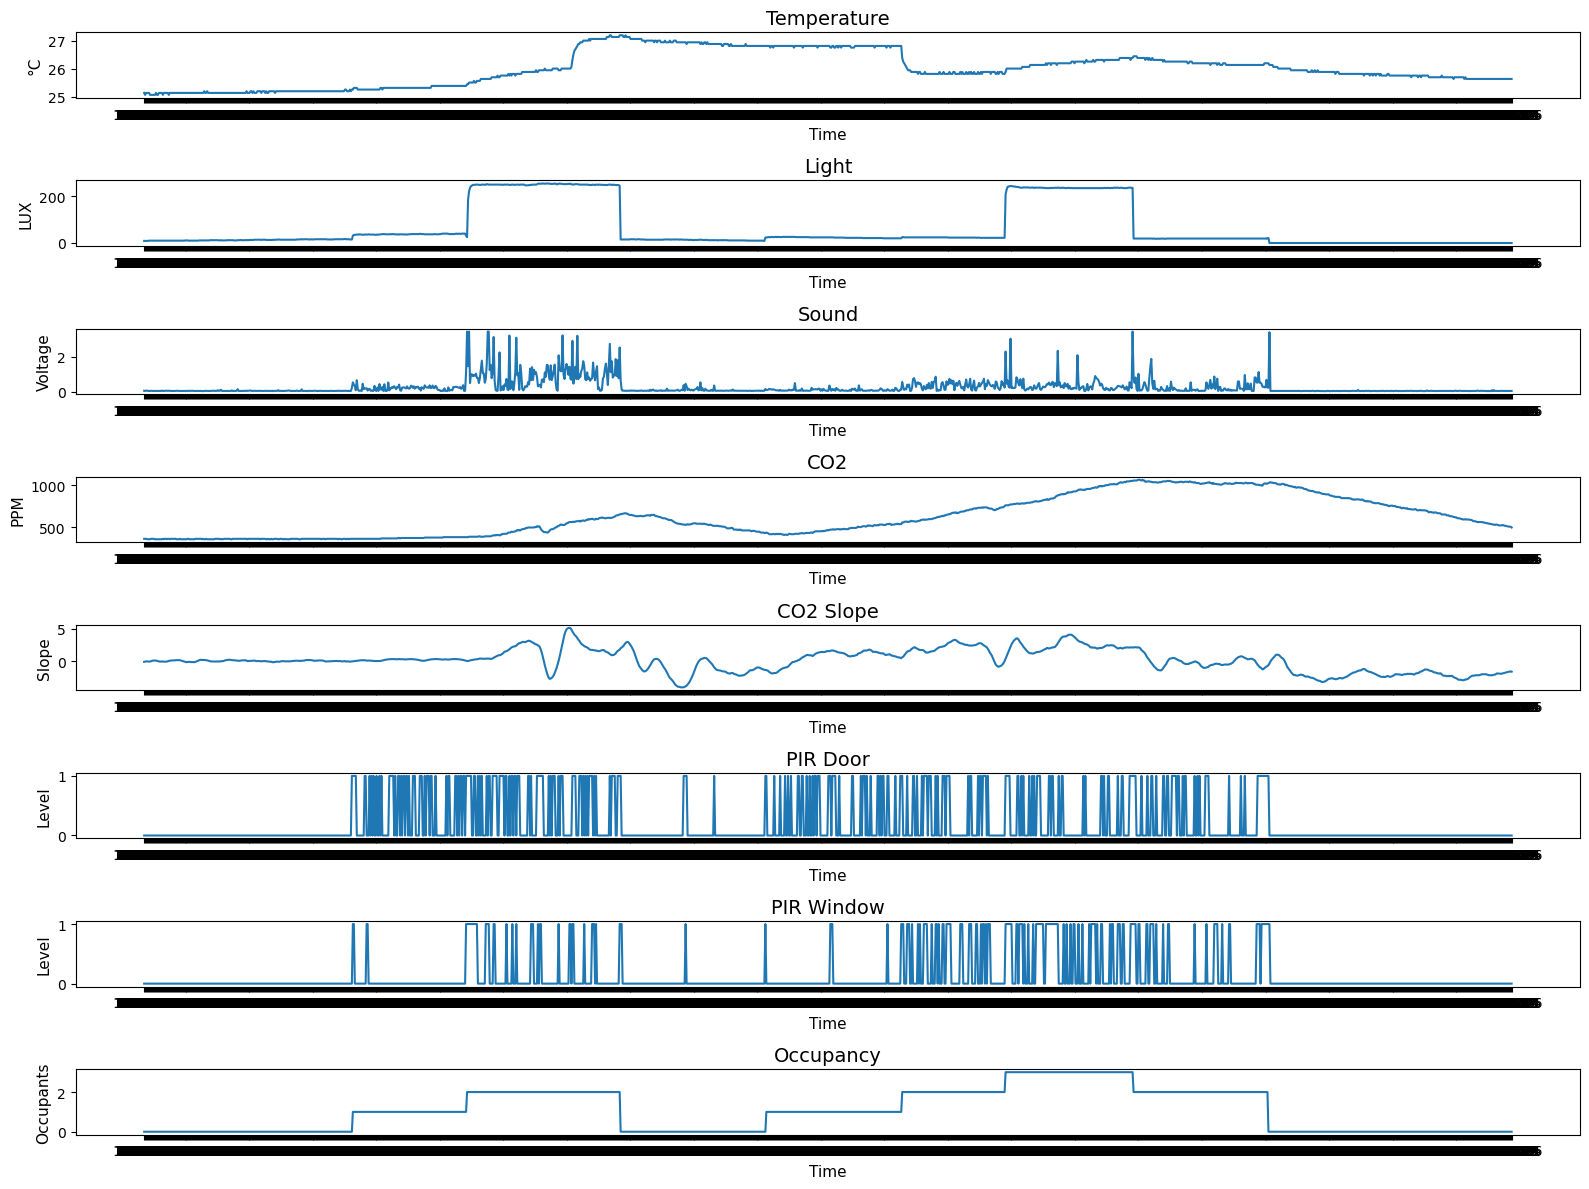

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Line Plot for Sensor 2 all variables, CO2 Sensor 5, PIR Sensor 6, PIR Sensor 7 and Occupancy against time 

df_plot = df.iloc[2620:4010]

x_axis = df_plot["Time"]

y_axis_temp = df_plot["S2_Temp"]

y_axis_light = df_plot["S2_Light"]

y_axis_sound = df_plot["S2_Sound"]

y_axis_CO2 = df_plot["S5_CO2"]

y_axis_CO2_slope = df_plot["S5_CO2_Slope"]

y_axis_PIR_door = df_plot["S6_PIR"]

y_axis_PIR_window = df_plot["S7_PIR"]

y_axis_occupancy = df_plot["Room_Occupancy_Count"]

fig, axes = plt.subplots(8,1, figsize = (16,12))

sensor_name = ["Temperature", "Light", "Sound", "CO2", "CO2 Slope", "PIR Door", "PIR Window", "Occupancy"]
sensor_type = [y_axis_temp, y_axis_light, y_axis_sound, y_axis_CO2, y_axis_CO2_slope, y_axis_PIR_door, y_axis_PIR_window, y_axis_occupancy]
sensor_value = ["°C", "LUX", "Voltage", "PPM", "Slope", "Level", "Level", "Occupants"]

for i, axes in enumerate(axes.flatten()):
    axes.plot(x_axis, sensor_type[i])
    axes.set_title(sensor_name[i], fontsize = 14)
    axes.set_xlabel("Time", fontsize = 11)
    axes.set_ylabel(sensor_value[i], fontsize=11)
    
plt.tight_layout()
plt.show()


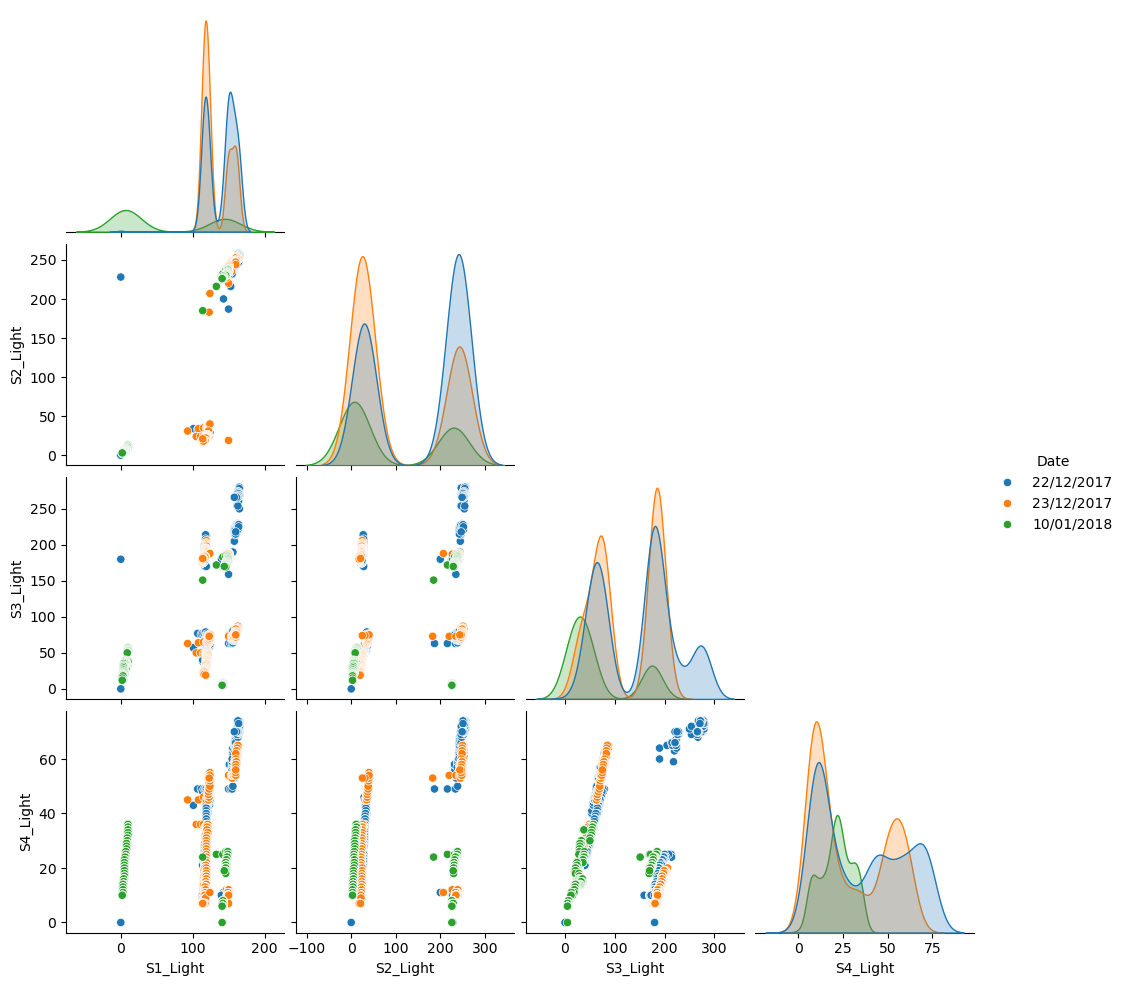

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

#filter_date = df.loc[df["Date"] == "22/12/2017", ["S1_Temp"]] 

df_pairplot = df.loc[df["Date"] == "23/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp", "S5_CO2"]] 

df_pairplot2 = df.loc[df["Date"] == "24/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot3 = df.loc[df["Date"] == "25/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot4 = df.loc[df["Date"] == "26/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot5 = df.loc[df["Date"] == "10/01/2018", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot6 = df.loc[df["Date"] == "11/01/2018", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot7 = df.loc[df["Date"] == "22/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot8 = df.loc[df["Date"] == "23/12/2017", ["S2_Temp", "S2_Light", "S2_Sound", "S5_CO2","Room_Occupancy_Count"]] 

df_pairplot9 = df.loc[:, ["Date","S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot10 = df.loc[:, ["Date","S1_Light", "S2_Light", "S3_Light", "S4_Light"]] 

df_pairplot11 = df.loc[df["Date"] == "23/12/2017", ["S1_Light", "S2_Light", "S3_Light", "S4_Light"]] 

df_pairplot11 = df.loc[df["Date"] == "23/12/2017", ["S1_Sound", "S2_Sound", "S3_Sound", "S4_Sound"]] 

df_pairplot12 = df.loc[df["Room_Occupancy_Count"] > 0, ["Date","S1_Sound", "S2_Sound", "S3_Sound", "S4_Sound"]] 

df_pairplot13 = df.loc[df["Room_Occupancy_Count"] > 0, ["Date","S1_Light", "S2_Light", "S3_Light", "S4_Light"]] 

#sns.pairplot(df_pairplot11, corner = True)

sns.pairplot(df_pairplot13, hue = "Date", corner = True)

#sns.pairplot(df_pairplot, corner = True)
            
#sns.pairplot(df_pairplot8, hue = "Room_Occupancy_Count", corner = True)





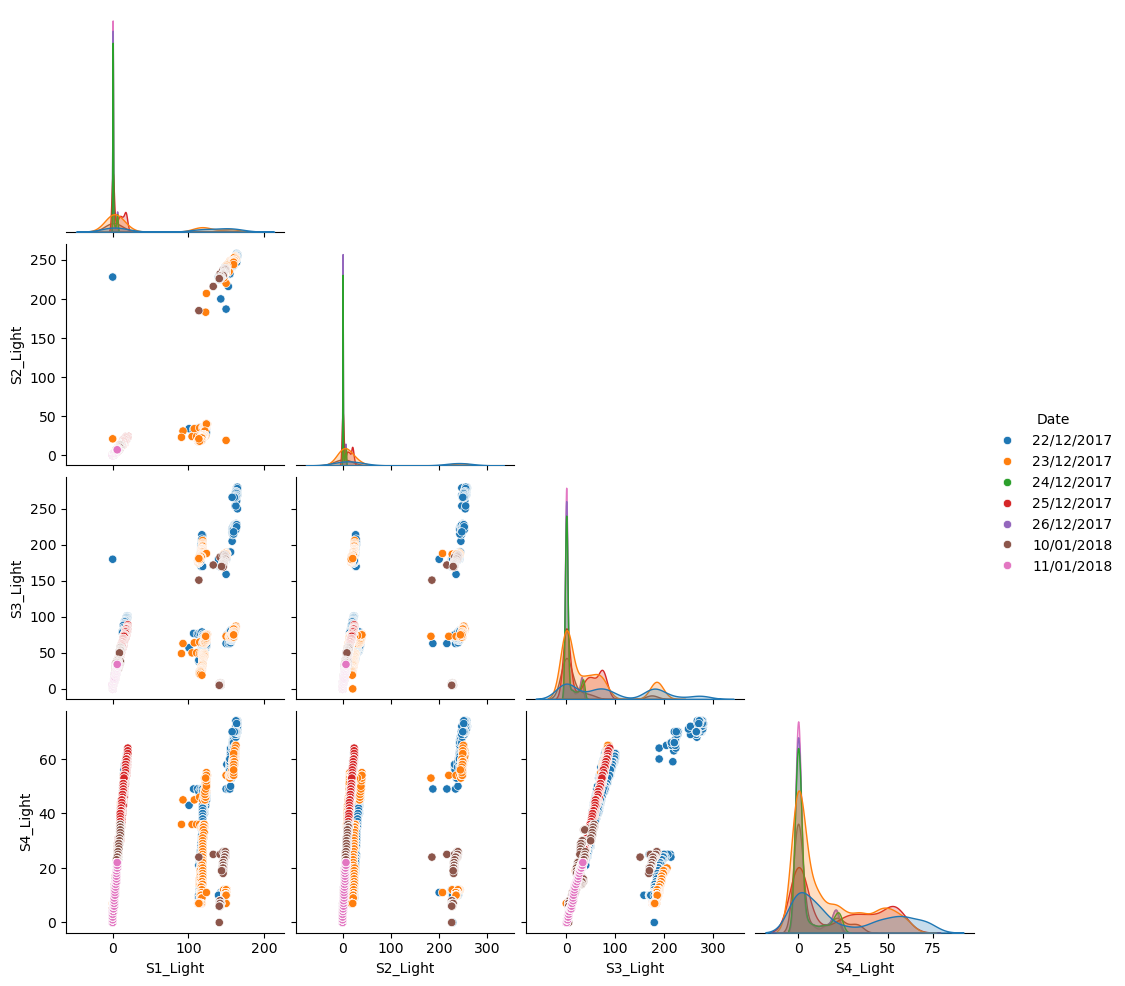

In [39]:
sns.pairplot(df_pairplot10, hue = "Date", corner = True)


<Axes: >

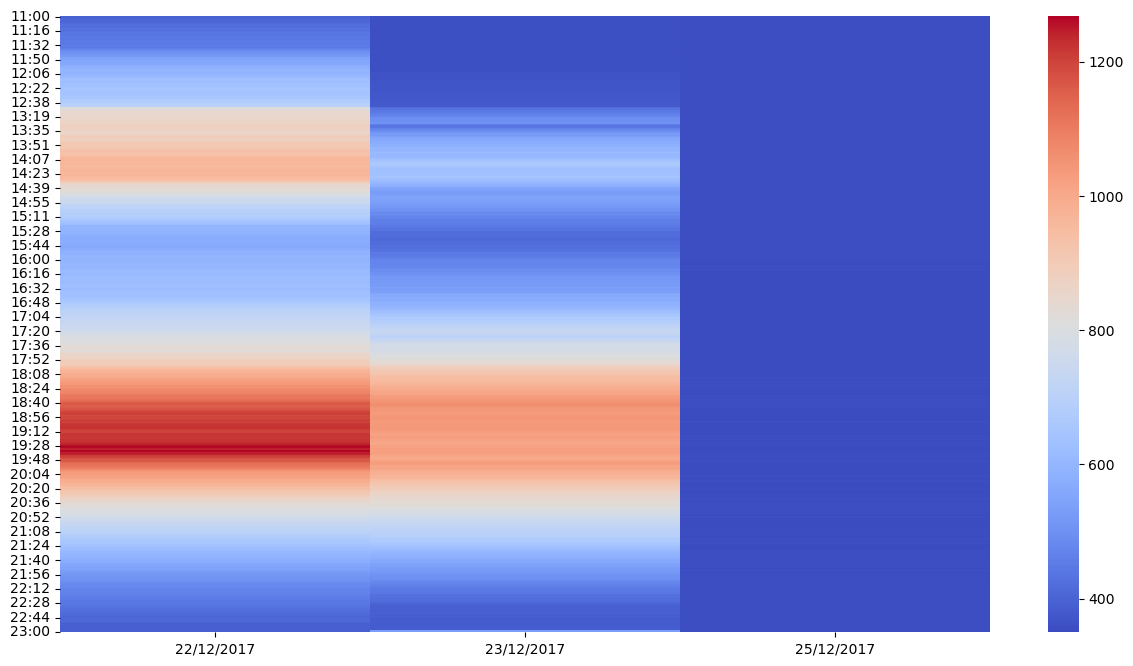

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_heatmap = df.copy() 

heat_map_dates = ["22/12/2017", "23/12/2017", "25/12/2017"]

df_heatmap["Time"] = pd.to_datetime(df_heatmap["Time"], format = "%H:%M:%S")
df_heatmap["Time"] = df_heatmap["Time"].dt.strftime("%H:%M")

df_filtered = df_heatmap.loc[:, ["Date", "Time", "S5_CO2"]]

heatmap_group = df_filtered.groupby(["Date","Time"], as_index = False).mean()

heatmap_reduction = heatmap_group[(heatmap_group["Date"].isin(heat_map_dates)) & (heatmap_group["Time"] >= "11:00") & (heatmap_group["Time"] <= "23:00")] 

heatmap_missing_time = {
                        "Date": ["23/12/2017", "23/12/2017"],
                        "Time": ["16:38", "16:39"],
                        "S5_CO2": [535, 535]
}

missing_time_df = pd.DataFrame(heatmap_missing_time)

equal_time_spacing = heatmap_reduction.loc[heatmap_reduction["Date"] == "22/12/2017", ["Time"]]

equal_time_spacing_list = equal_time_spacing["Time"].tolist()

heatmap_equalising_time_entries = heatmap_reduction[(heatmap_reduction["Time"].isin(equal_time_spacing_list))]

heatmap_equalising_time_entries2 = pd.concat([heatmap_equalising_time_entries, missing_time_df]) 

heatmap_date = heatmap_reduction["Date"].unique().tolist()

heatmap_time = heatmap_reduction["Time"].tolist()

#heatmap_equalising_time_entries2.to_csv("Check4.csv")

Final_dic = {}

#date_filter = heatmap_reduction.loc[heatmap_reduction["Date"] == "22/12/2017","S5_CO2"]

for dates in heatmap_date:
    for time in equal_time_spacing_list:
        date_filter = heatmap_equalising_time_entries2.loc[heatmap_equalising_time_entries2["Date"] == dates,"S5_CO2"]
        CO2_List = date_filter.tolist()
        Final_dic[dates] = CO2_List

heatmap_df = pd.DataFrame(Final_dic, index = equal_time_spacing_list)

#heatmap_df.to_csv("Check5.csv")

#CO2_Values = []

#H = {}

#for x in range(len(df_date)):
#    CO2_Value = df_heatmap.iloc[x, 14]
    
#    H[df_date[x]] = df_heatmap.iloc[x, 14]
    
#heatmap_df = pd.DataFrame(H, index = df_time)

#heatmap_df

#print(df_time)

#df_heatmap

#df_heatmap_pivoted = df_heatmap.pivot("Date", "Time", "S5_CO2")

plt.figure(figsize=(15,8))

sns.heatmap(heatmap_df, cmap = "coolwarm")


<Axes: xlabel='Room_Occupancy_Count', ylabel='S5_CO2'>

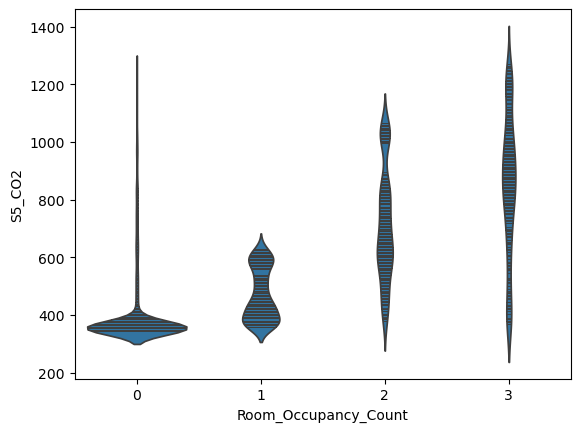

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_violinplot = df.copy()

violin_dates = ["22/12/2017", "23/12/2017", "10/01/2018"]

df_violinplot_date_filter = df_violinplot[df_violinplot["Date"].isin(violin_dates)]

sns.violinplot(data = df_violinplot, x = "Room_Occupancy_Count", y = "S5_CO2", inner = "stick")

#hue = "Date", split = True, inner = "quart")


<Axes: xlabel='Room_Occupancy_Count', ylabel='S5_CO2'>

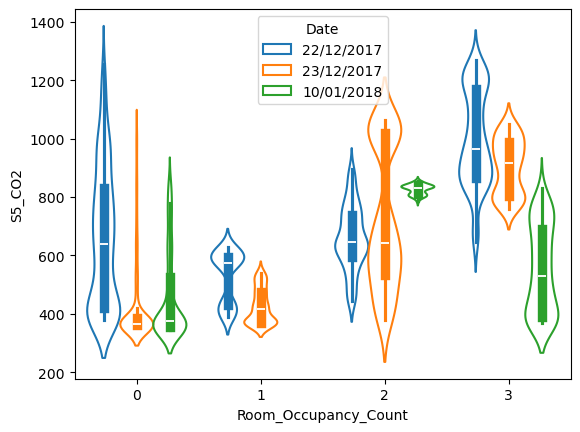

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_violinplot = df.copy()

violin_dates = ["22/12/2017", "23/12/2017", "10/01/2018"]

df_violinplot_date_filter = df_violinplot[df_violinplot["Date"].isin(violin_dates)]

#sns.violinplot(data = df_violinplot, x = "Room_Occupancy_Count", y = "S5_CO2", inner = "stick")

sns.violinplot(data = df_violinplot_date_filter, x = "Room_Occupancy_Count", y = "S5_CO2", hue = "Date", density_norm = "width", fill = False)

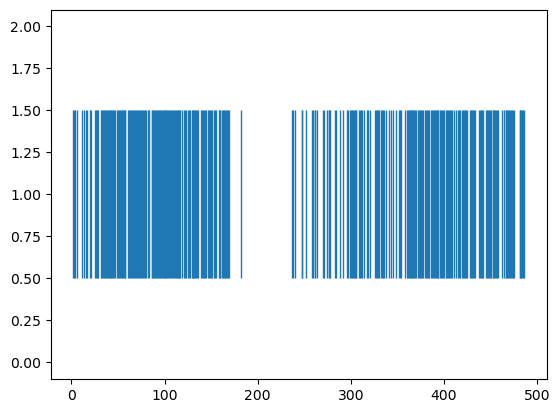

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_event = df.copy()

event_dates = ["22/12/2017", "23/12/2017"]

df_event["Time"] = pd.to_datetime(df_event["Time"], format = "%H:%M:%S")
df_event["Time"] = df_event["Time"].dt.strftime("%H:%M")

df_event_column_reduction = df_event.loc[:, ["Date", "Time", "S6_PIR", "S7_PIR", "Room_Occupancy_Count"]]

df_event_merge_time = df_event_column_reduction.groupby(["Date","Time"], as_index = False).max()

df_event_intervals = df_event_merge_time[(df_event_merge_time["Date"].isin(event_dates)) & (df_event_merge_time["Time"] >= "11:00") & (df_event_merge_time["Time"] <= "23:00")] 

df_event_22_12_17 = df_event_intervals[df_event_intervals["Date"] == "22/12/2017"]

df_event_22_12_17 = df_event_22_12_17.copy()

df_event_22_12_17.loc[:,"Time_Number"] = range(0,689)

#df_event_22_12_17.to_csv("Check7.csv")

tick_position = [0,100,200,300,400,500

x_tick_labels = ["11:00", "12:42", "14:47", "16:28", "18:08", "19:52"]  

df_event_22_12_17_PIR_Door = df_event_22_12_17[df_event_22_12_17["S6_PIR"] == 1]

df_event_time_number_list_D = df_event_22_12_17_PIR_Door["Time_Number"].tolist()

df_event_time_list_D = df_event_22_12_17_PIR_Door["Time"].tolist()

df_event_22_12_17_PIR_Window = df_event_22_12_17[df_event_22_12_17["S7_PIR"] == 1]

df_event_time_number_list_W = df_event_22_12_17_PIR_Window["Time_Number"].tolist()

df_event_time_list_W = df_event_22_12_17_PIR_Window["Time"].tolist()

#fig = plt.figure(figsize = (12,10))

plt.eventplot(positions = df_event_time_number_list_D, linewidth = 1)

#plt.xtick(np.arange(0

#df_event_time_number_list_W

#print(len(df_event_time_list_D), len(df_event_time_list_W))

#print(df_event_time_number_list_D, df_event_time_list_D)

In [92]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (24 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)